In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display
import warnings
import re
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn import linear_model
from sklearn import cluster
from sklearn.cluster import AgglomerativeClustering

warnings.filterwarnings('ignore')

%config Completer.use_jedi = False
%matplotlib inline


In [53]:
saitama_df = pd.read_csv('saitama.csv')

#  Tratamento

In [65]:
df = saitama_df.drop(columns=['id'])
df

,tag,days_since_published,font,word_count,opinion
0,Marvel,93,G1,200,Read
1,Marvel,382,Instagram,700,Read
2,Marvel,101,Twitter,400,Read
3,Marvel,612,Others,850,Read
4,Marvel,146,Twitter,300,Read
...,...,...,...,...,...
3595,Series,124,G1,450,Skipped
3596,Movies,290,Google,950,Skipped
3597,Finances,350,BBC,200,Skipped
3598,Series,367,Twitter,650,Read


In [66]:
tag_encoder = LabelEncoder()
df['tag_id'] = tag_encoder.fit_transform(df['tag'])
df

,tag,days_since_published,font,word_count,opinion,tag_id
0,Marvel,93,G1,200,Read,4
1,Marvel,382,Instagram,700,Read,4
2,Marvel,101,Twitter,400,Read,4
3,Marvel,612,Others,850,Read,4
4,Marvel,146,Twitter,300,Read,4
...,...,...,...,...,...,...
3595,Series,124,G1,450,Skipped,7
3596,Movies,290,Google,950,Skipped,5
3597,Finances,350,BBC,200,Skipped,2
3598,Series,367,Twitter,650,Read,7


In [67]:
font_encoder = LabelEncoder()
df['font_id'] = font_encoder.fit_transform(df['font'])
df

,tag,days_since_published,font,word_count,opinion,tag_id,font_id
0,Marvel,93,G1,200,Read,4,1
1,Marvel,382,Instagram,700,Read,4,3
2,Marvel,101,Twitter,400,Read,4,5
3,Marvel,612,Others,850,Read,4,4
4,Marvel,146,Twitter,300,Read,4,5
...,...,...,...,...,...,...,...
3595,Series,124,G1,450,Skipped,7,1
3596,Movies,290,Google,950,Skipped,5,2
3597,Finances,350,BBC,200,Skipped,2,0
3598,Series,367,Twitter,650,Read,7,5


In [68]:
opinion_encoder = LabelEncoder()
df['opinion_id'] = opinion_encoder.fit_transform(df['opinion'])
df

,tag,days_since_published,font,word_count,opinion,tag_id,font_id,opinion_id
0,Marvel,93,G1,200,Read,4,1,0
1,Marvel,382,Instagram,700,Read,4,3,0
2,Marvel,101,Twitter,400,Read,4,5,0
3,Marvel,612,Others,850,Read,4,4,0
4,Marvel,146,Twitter,300,Read,4,5,0
...,...,...,...,...,...,...,...,...
3595,Series,124,G1,450,Skipped,7,1,1
3596,Movies,290,Google,950,Skipped,5,2,1
3597,Finances,350,BBC,200,Skipped,2,0,1
3598,Series,367,Twitter,650,Read,7,5,0


In [69]:
data = df.drop(columns=['tag','font','opinion'])
data

,days_since_published,word_count,tag_id,font_id,opinion_id
0,93,200,4,1,0
1,382,700,4,3,0
2,101,400,4,5,0
3,612,850,4,4,0
4,146,300,4,5,0
...,...,...,...,...,...
3595,124,450,7,1,1
3596,290,950,5,2,1
3597,350,200,2,0,1
3598,367,650,7,5,0


# Normalizacao

In [70]:
scaler = MinMaxScaler()
data[["days_since_published", "word_count", "tag_id", "font_id"]] = scaler.fit_transform(data[["days_since_published", "word_count", "tag_id", "font_id"]])
data

,days_since_published,word_count,tag_id,font_id,opinion_id
0,0.127572,0.117647,0.500,0.166667,0
1,0.524005,0.705882,0.500,0.500000,0
2,0.138546,0.352941,0.500,0.833333,0
3,0.839506,0.882353,0.500,0.666667,0
4,0.200274,0.235294,0.500,0.833333,0
...,...,...,...,...,...
3595,0.170096,0.411765,0.875,0.166667,1
3596,0.397805,1.000000,0.625,0.333333,1
3597,0.480110,0.117647,0.250,0.000000,1
3598,0.503429,0.647059,0.875,0.833333,0


<AxesSubplot:>

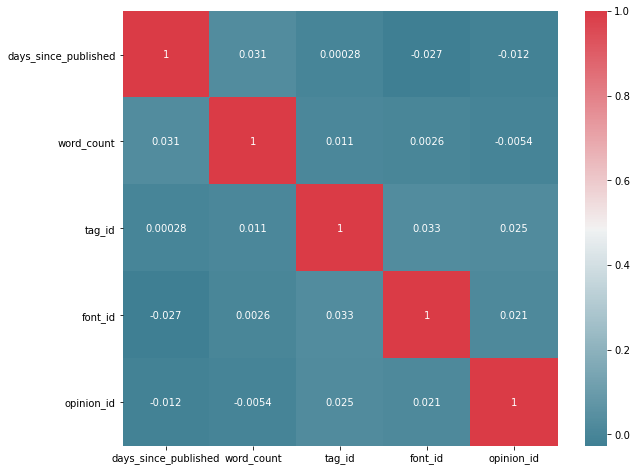

In [71]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr,
            mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)

# Treino com  o  Knn (através  de  pesquisa,  vi que para classificador binario o knn é um dos melhores, então estou usando ele)

In [88]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [89]:
X = data.drop(columns=['opinion_id'])
y = pd.DataFrame(data=data['opinion_id'])

In [73]:
X

,days_since_published,word_count,tag_id,font_id
0,0.127572,0.117647,0.500,0.166667
1,0.524005,0.705882,0.500,0.500000
2,0.138546,0.352941,0.500,0.833333
3,0.839506,0.882353,0.500,0.666667
4,0.200274,0.235294,0.500,0.833333
...,...,...,...,...
3595,0.170096,0.411765,0.875,0.166667
3596,0.397805,1.000000,0.625,0.333333
3597,0.480110,0.117647,0.250,0.000000
3598,0.503429,0.647059,0.875,0.833333


In [74]:
y

,opinion_id
0,0
1,0
2,0
3,0
4,0
...,...
3595,1
3596,1
3597,1
3598,0


In [75]:
X.shape

(3600, 4)

In [76]:
y.shape

(3600, 1)

## Holdout

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Choosing K

Maximum accuracy:- 0.5935185185185186 at K = 10


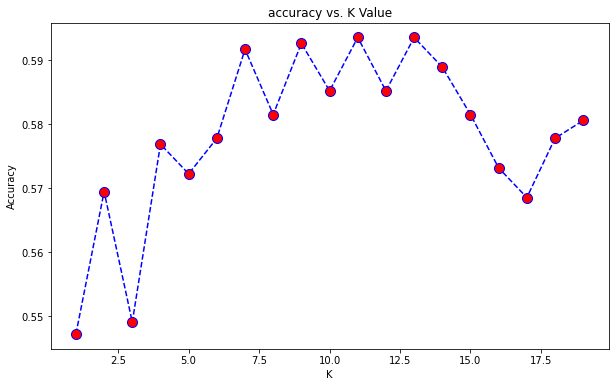

In [101]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,20):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,20),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

##  Cross Validation

In [102]:
clf = KNeighborsClassifier(n_neighbors=13, weights='uniform')
scores = cross_val_score(clf, X_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.57 (+/- 0.03)


# Knn

In [138]:
from sklearn.metrics import accuracy_score
from operator import itemgetter
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

confusion_m = []
precision_r = []

for i in range(1, 21):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    cfm = confusion_matrix(y_test, y_pred)
    pr = classification_report(y_test, y_pred)
    confusion_m.append(cfm)
    precision_r.append(pr)


a for k =  1
              precision    recall  f1-score   support

           0       0.62      0.61      0.61       635
           1       0.45      0.46      0.46       445

    accuracy                           0.55      1080
   macro avg       0.53      0.53      0.53      1080
weighted avg       0.55      0.55      0.55      1080





a for k =  2
              precision    recall  f1-score   support

           0       0.60      0.82      0.69       635
           1       0.45      0.21      0.29       445

    accuracy                           0.57      1080
   macro avg       0.52      0.52      0.49      1080
weighted avg       0.54      0.57      0.53      1080





a for k =  3
              precision    recall  f1-score   support

           0       0.61      0.64      0.63       635
           1       0.45      0.42      0.43       445

    accuracy                           0.55      1080
   macro avg       0.53      0.53      0.53      1080
weighted avg       0.54    

#  Classification  Report
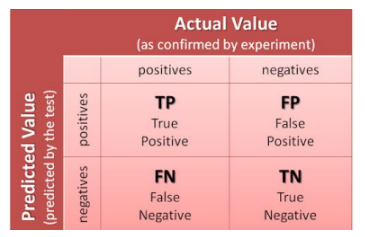

In [105]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.81      0.70       635
           1       0.49      0.27      0.35       445

    accuracy                           0.59      1080
   macro avg       0.55      0.54      0.52      1080
weighted avg       0.56      0.59      0.55      1080



<AxesSubplot:>

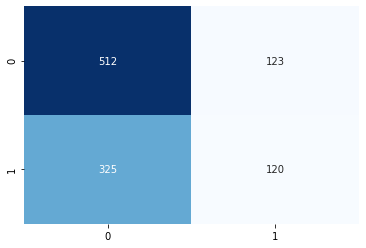

In [107]:
cfm = confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, cbar=False, annot=True, cmap="Blues", fmt="d")

<AxesSubplot:>

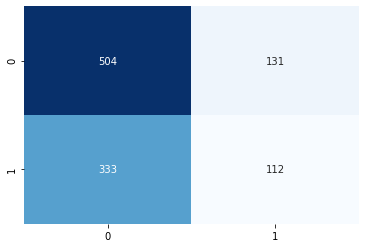

In [129]:
sns.heatmap(confusion_m[], cbar=False, annot=True, cmap="Blues", fmt="d")

#   Analisys

 half  10


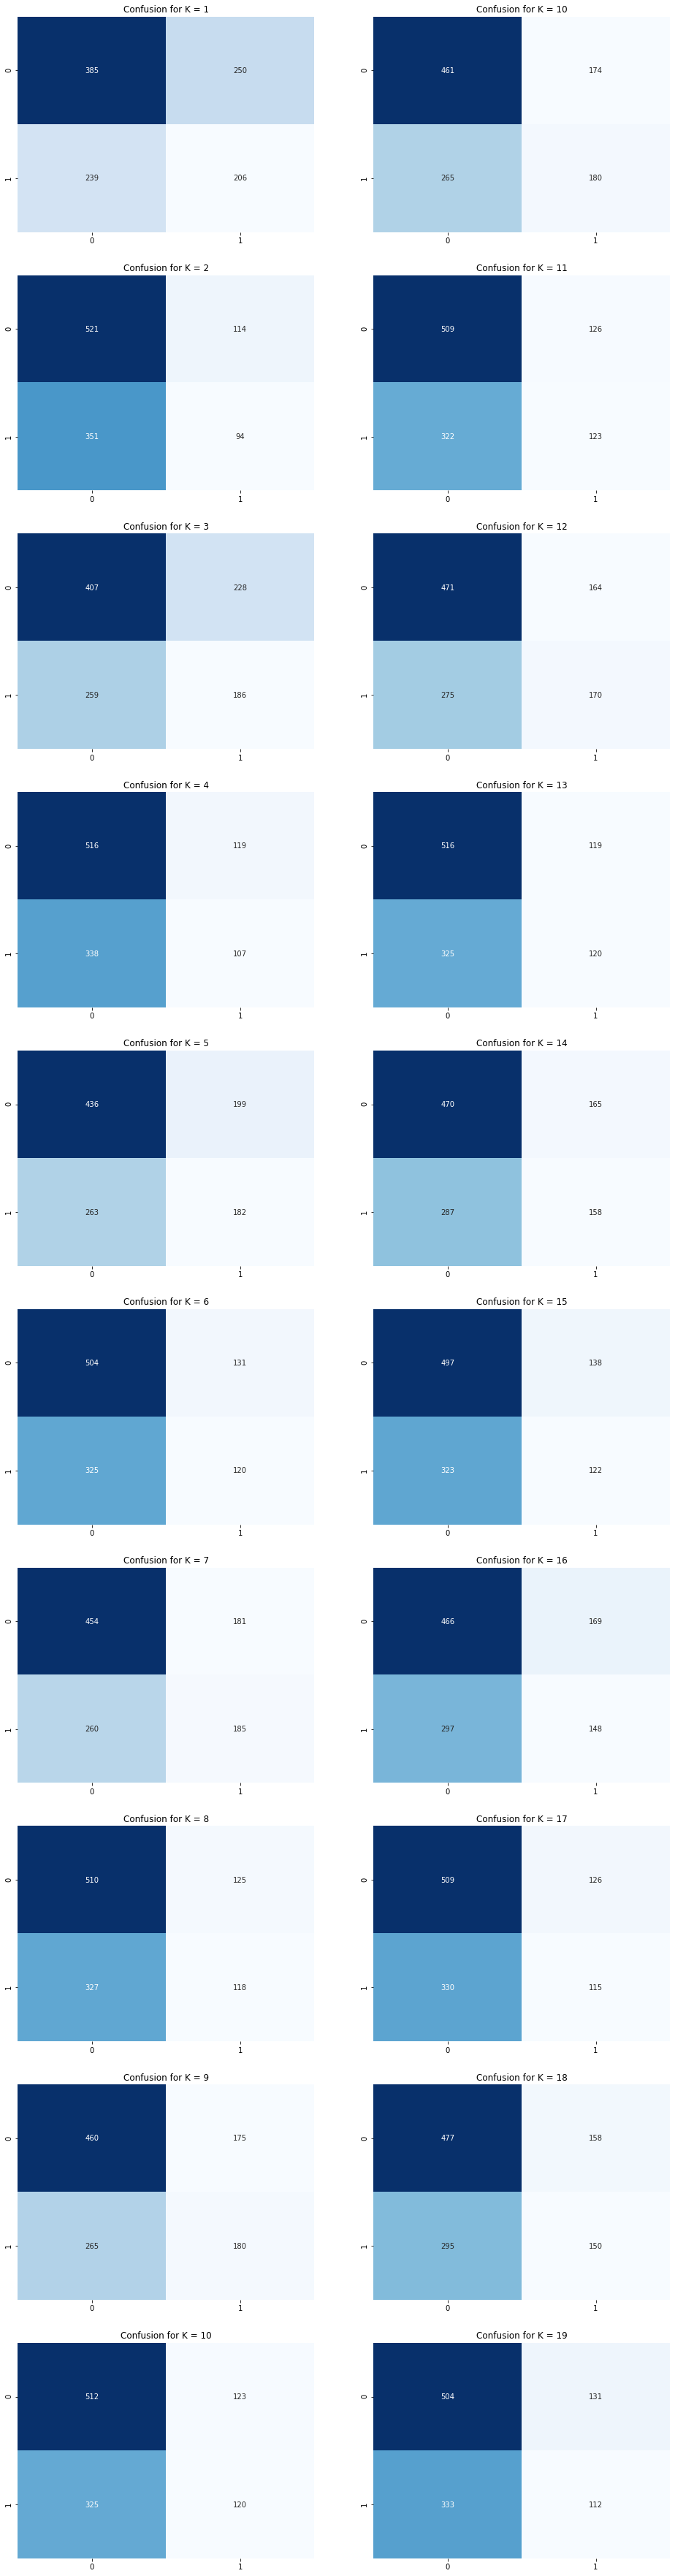

In [132]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(int(len(confusion_m)/2), 2, figsize=(16,64))
print(' half ', int(len(confusion_m)/2))

# Ver quem teve mais Trues, e quem teve mais Falses
for i in range(0, int(len(confusion_m)/2)):
    sns.heatmap(confusion_m[i], cbar=False, annot=True, cmap="Blues", fmt="d", ax=axes[i,0])
    title = "Confusion for K = {0}".format(i+1)
    axes[i][0].set_title(title)
    
    index = int(len(confusion_m)/2)+i
    sns.heatmap(confusion_m[index], cbar=False, annot=True, cmap="Blues", fmt="d", ax=axes[i,1])
    title = "Confusion for K = {0}".format(index)
    axes[i][1].set_title(title)


In [133]:
def precision_to_DataFrame(precision):
    x = precision.split()
    x_titles = x[0:4]

    precision_survived = x[5]
    recall_survived = x[6]
    f1_score_survived = x[7]
    support_survived = x[8]

    acuracy_survived = x[15]

    precision_dead = x[10]
    recall_dead = x[11]
    f1_score_dead = x[12]
    support_dead = x[13]

    acuracy_dead = x[16]

    y_titles = [x[4], x[9], x[14],(x[17]+" "+x[18]),(x[23]+" "+x[24])]
    x_titles.append(x[14])
    df_data = {'precision':[precision_dead, precision_survived], 'recall':[recall_dead, recall_survived],
              'f1-score':[f1_score_dead,f1_score_survived], 'support':[support_dead, support_survived],
              'accuracy':[acuracy_dead,acuracy_survived]}
    df = pd.DataFrame(data=df_data,columns=x_titles)
    return df

## Comparando a precisao e numero de acertos
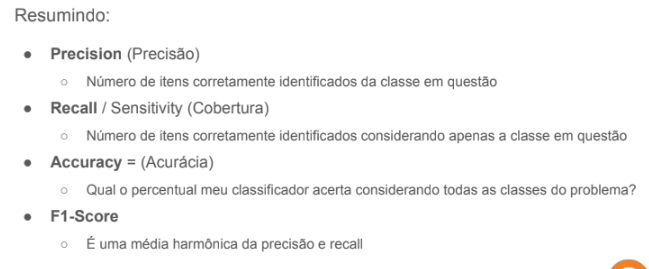

In [150]:
d1 = precision_to_DataFrame(precision_r[i])
print(1)
d1

1


,precision,recall,f1-score,support,accuracy
0,0.46,0.25,0.33,445,1080
1,0.60,0.79,0.68,635,0.57


In [158]:
frames = []
for i in range(0, 20):
#     print(i, end=' ')
    d1 = precision_to_DataFrame(precision_r[i])
    d1['opinion'] = ['Read', 'Skip']
#     print(d1)
    frames.append(d1)

In [159]:
frames[0]

,precision,recall,f1-score,support,accuracy,opinion
0,0.45,0.46,0.46,445,1080,Read
1,0.62,0.61,0.61,635,0.55,Skip


In [162]:
for i in range(len(frames)):
    for col in frames[i]:
        if ((col != 'opinion' )):
            frames[i][col] = frames[i][col].astype(float)

<AxesSubplot:xlabel='opinion', ylabel='precision'>

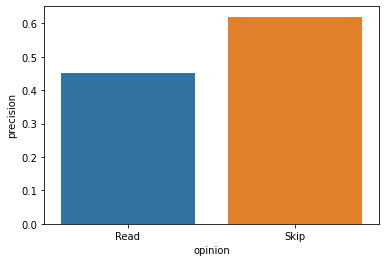

In [163]:
sns.barplot(x='opinion', y='precision', data = frames[0])

 half  10


AttributeError: 'list' object has no attribute 'bar'

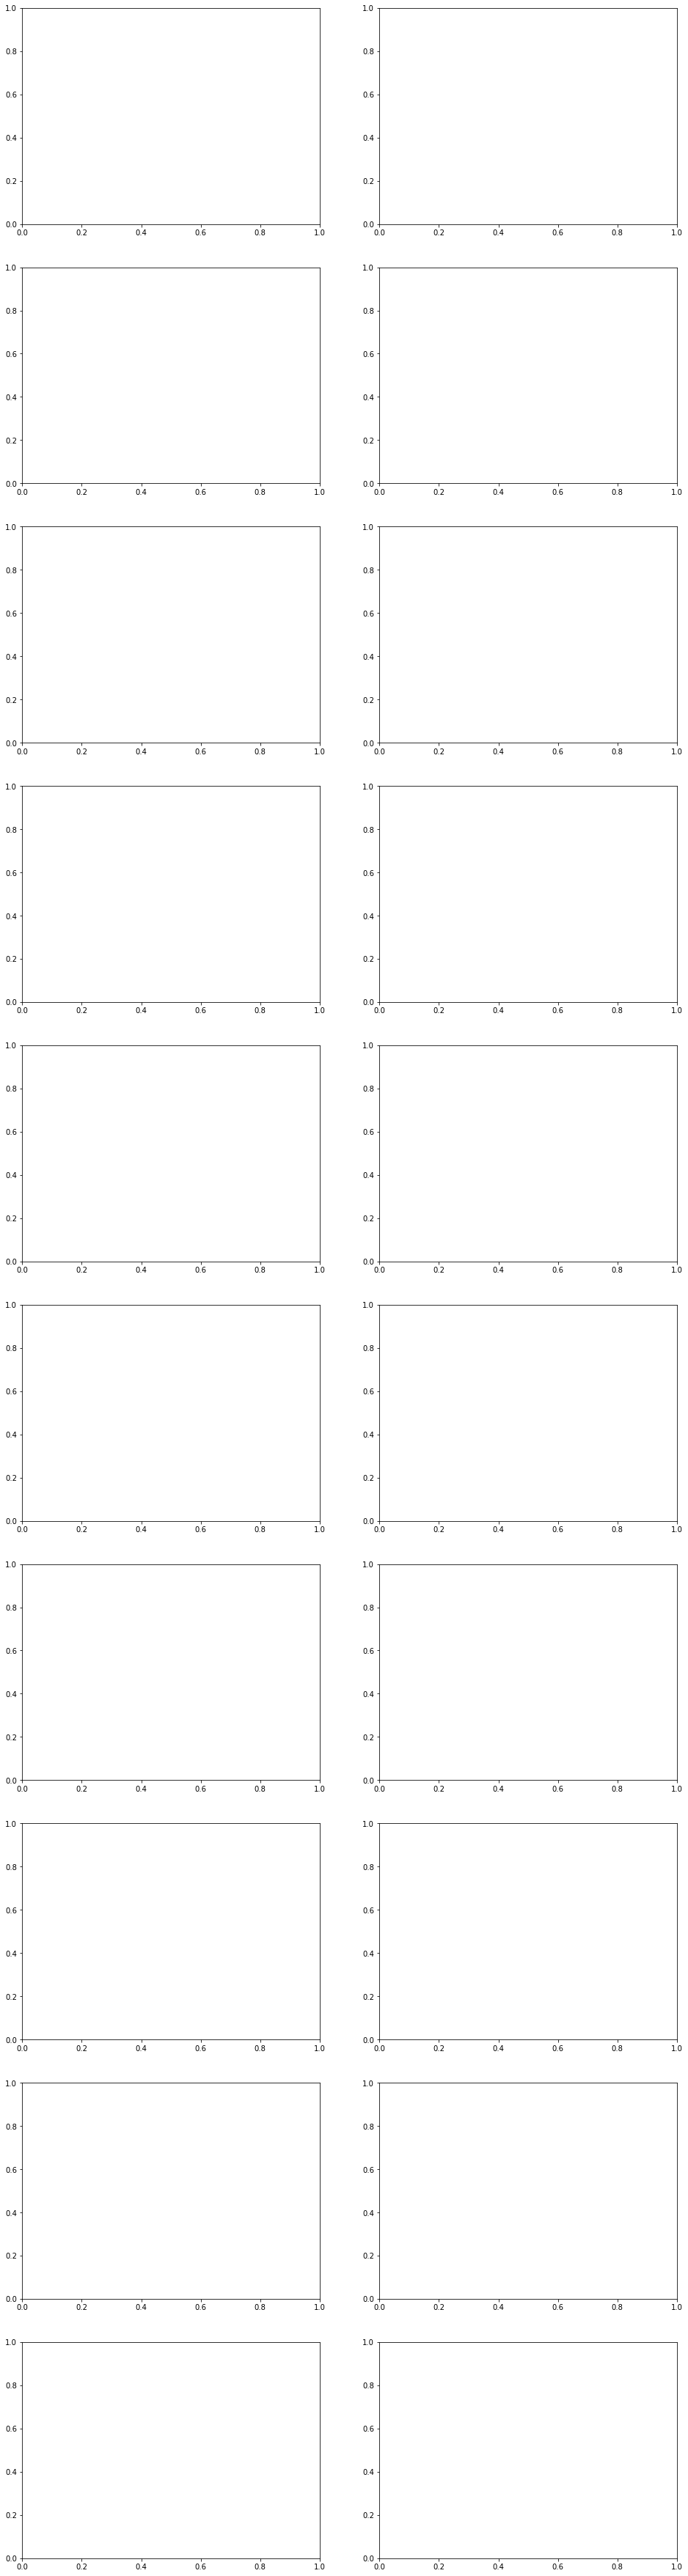

In [164]:
fig, axes = plt.subplots(int(len(confusion_m)/2), 2, figsize=(16,64))
print(' half ', int(len(confusion_m)/2))

# Ver quem teve mais Trues, e quem teve mais Falses
for i in range(0, int(len(confusion_m)/2)):
    sns.barplot(x='opinion', y='precision', data = frames[i], ax=[i,0])
    title = "Precision for K = {0}".format(i+1)
    axes[i][0].set_title(title)
    
    index = int(len(confusion_m)/2)+i
    sns.barplot(x='opinion', y='precision', data = frames[index], ax=[i,1])
    title = "Precision for K = {0}".format(index)
    axes[i][1].set_title(title)


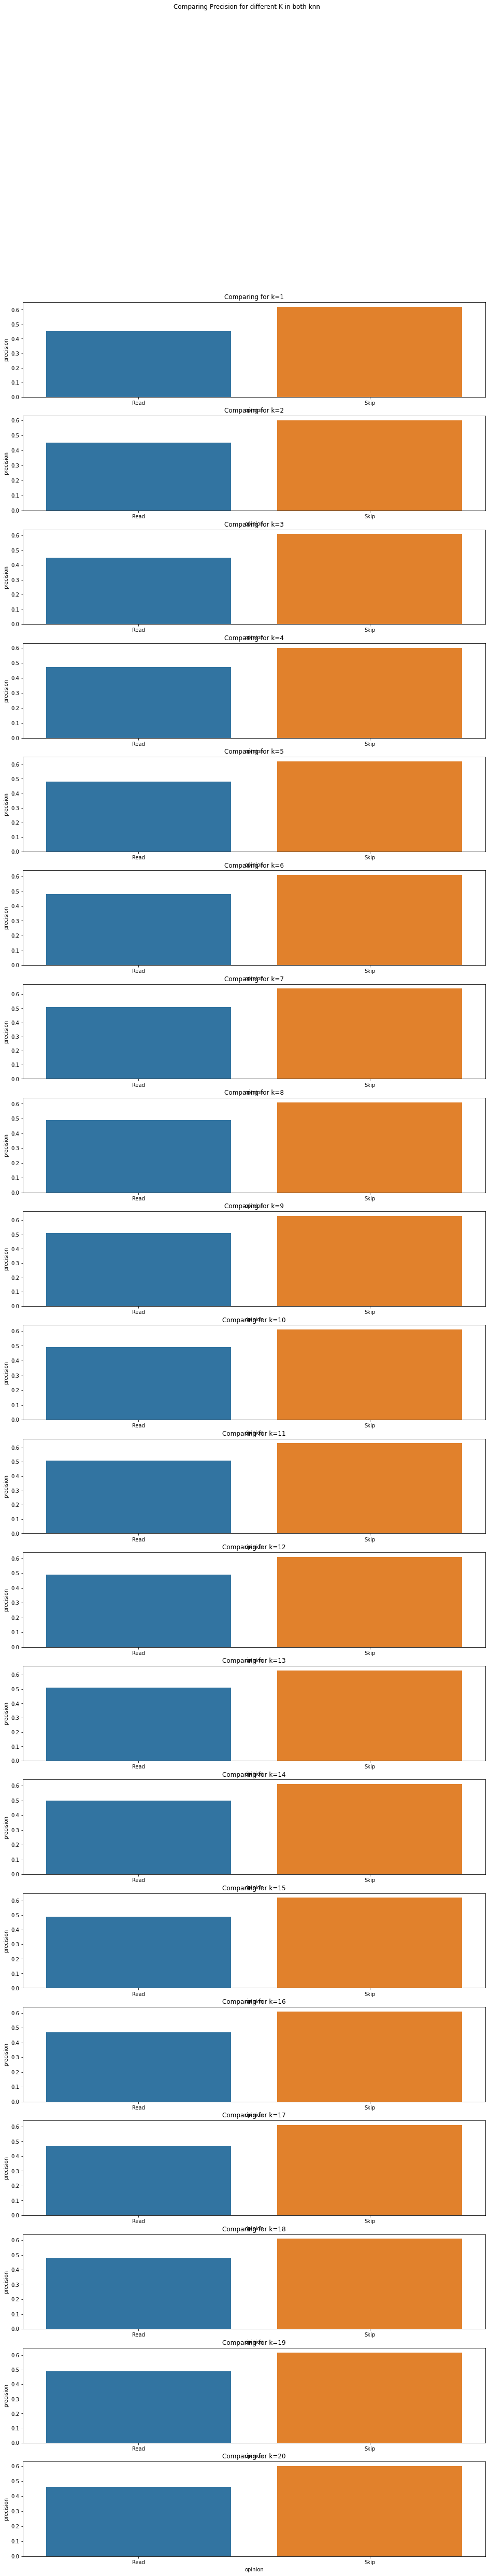

In [168]:
fig, axes = plt.subplots(20, 1, figsize=(16,80))

fig.suptitle("Comparing Precision for different K in both knn")

for i in range(0, len(frames)):
    sns.barplot(x="opinion", y="precision", data = frames[i], ax=axes[i])
    title = "Comparing for k={}".format(i+1)
    axes[i].set_title(title)